# END TO END 3D medical imaging solution

[VIDEO LINK](https://youtu.be/EKyT8xP5lqc)

## Conceptual map
As usual, let’s put the content of this lesson into the perspective of our conceptual map, highlighting the relevant concepts below.
<img src='img/l1-course-overview.png'>

## Lesson Summary
- In this lesson, we will do a quick refresher on how __convolutional neural networks__ operate and specifically dive into the __different types of convolutions__ that underlie the operation of these networks.
- We will talk about some ways to approach __segmentation and classification__ problems.
- After that, we will jump in and __train our own segmentation network__.
- Then we will discuss some of the technical methods for __evaluating performance of CNNs for medical image analysis__, and talk about the clinical aspect of evaluating performance.

But before we jump in, I would like to take a brief detour and align on the basic definitions. We will be using terms like Artificial Intelligence, Computer Vision, Deep Learning, Machine Learning, and it’s important to get on the same page with regards to how they are related. Here is a diagram that represents this:

<img src="img/l3-ai-ml-dl-cv.png">

As discussed in the introductory lesson, __Artificial Intelligence__ could be defined as “Application of Machine Learning techniques to a real-world problem, improving human productivity and capability.”. Artificial intelligence is a field that draws heavily upon the field of __Machine Learning__, which deals with building algorithms that do not have to be explicitly coded but rather can adjust parameters from data. Machine learning includes many tools and techniques for working with a vast variety of data and one of the techniques is the __Deep Learning__, which is all about building deep neural networks.

However, to improve human productivity and capability, the field of AI relies on many other fields - such as robotics, HCI, systems design, cloud computing, and so on, including bioinformatics, as discussed in the previous lessons. Developing AI products for medical imaging relies heavily on the field of __Computer Vision__, which has been around for many decades, and which studies methods for automated image analysis.

Applying deep learning techniques by using methods developed by computer vision scientists has resulted in many rapid advances, including the invention of __Convolutional Neural Networks__ (CNN), which are the methods used for image analysis in this course.

We assume that you have basic familiarity with the principles underlying CNNs and the problems that CNNs can solve for general-purpose imaging - classification and segmentation in particular. In this lesson, we will provide a quick refresher on these two problems and will focus on how these problems are cast in the domain of 3D medical imaging.

## Classification: Introduction and Use Cases

[VIDEO LINK](https://youtu.be/M59z9er-w_E)

We have seen some of the examples of problems that lend themselves well to solutions via automated classification or object detection algorithm.

- Detecting __brain hemorrhages__, or bleedings in the brain is particularly important in emergency scenarios when brain damage can happen within minutes. Often, radiologists have a backlog of images that they are going through, and it is not obvious which ones should be prioritized. An algorithm that will spot time-critical conditions will help with such prioritization

- Screening and monitoring scenarios, such as the presented scenario of __screening for lung nodules__, can be quite tedious because objects that are sought can hide well, and meticulous scrolling through slices is required. Pointing human attention to areas which are likely to be suspicious is helpful and saves time

- The presented scenario of __incidental findings__ deals with an interesting phenomenon of selective attention where humans tend to ignore certain stimuli when multiple are applied. Thus, even trained observers may ignore something otherwise quite obvious, like an adrenal cyst when they know that image was taken with the purpose of evaluating potential vertebral disc degeneration. The famous [“gorilla study”](https://www.npr.org/sections/health-shots/2013/02/11/171409656/why-even-radiologists-can-miss-a-gorilla-hiding-in-plain-sight) represents this marvelously.

__Note__: when choosing a medical imaging problem to be solved by machine learning, it is tempting to assume that automated detection of certain conditions would be the most valuable thing to solve. However, this is not usually the case. Quite often detecting if a condition is present is not so difficult for a human observer who is already looking for such a condition. Things that bring most value usually lie in the area of productivity increase. Helping prioritize the more important exams, helping focus the attention of a human reader on small things or speed up tedious tasks usually is much more valuable. Therefore it is important to understand the clinical use case that the algorithm will be used well and think of end-user value first.

When it comes to classification and object detection problems, the key to solving those is identifying relevant features in the images, or feature extraction. Not so long ago, machine learning methods relied on manual feature design. With the advent of CNNs, feature extraction is done automatically by the network, and the job of a machine learning engineer is to define the general shape of such features. As the name implies, features in Convolutional Neural Networks take the shape of convolutions. In the next section, let’s take a closer look at some of the types of convolutions that are used for 3D medical image analysis.

__New Vocabulary__
__Classification__ - the problem of determining which one of several classes an image belongs to.
__Object Detection__ - the problem of finding a (typically rectangular) region within an image that matches with one of several classes of interest.

## Methods for feature extraction

[VIDEO LINK](https://youtu.be/bqrpWKXTps8)

We have discussed some methods for feature extraction such as 2D, 2.5D, and 3D convolutions.

A convolution is an operation that applies a convolutional filter to each pixel of an image. A more detailed explanation could be found in this great [Wikipedia article](https://en.wikipedia.org/wiki/Kernel_%28image_processing%29#Convolution).

A simple 2D convolution with a 3x3 kernel could be visualized by the following animation:

<img src="img/l3-conv.gif">

We have just discussed several types of convolutions that could be used for feature extraction of 3D medical images:

__2D Convolution__ is an operation visualized in the image above, where a convolutional filter is applied to a single 2D image. Applying a 2D convolution approach to a 3D medical image would mean applying it to every single slice of the image. A neural network can be constructed to either process slices one at a time, or to stack such convolutions into a stack of 2D feature maps. Such an approach is fastest of all and uses least memory, but fails to use any information about the topology of the image in the 3rd dimension.

__2.5D Convolution__ is an approach where 2D convolutions are applied independently to areas around each voxel (either in neighboring planes or in orthogonal planes) and their results are summed up to form a 2D feature map. Such an approach leverages some 3-dimensional information.

__3D Convolution__ is an approach where the convolutional kernel is 3 dimensional and thus combines information from all 3 dimensions into the feature map. This approach leverages the 3-dimensional nature of the image, but uses the most memory and compute resources.

Understanding these is essential to being able to put together efficient deep neural networks where convolutions together with downsampling are used to extract higher-order semantic features from the image.

Next up, we will take a closer look at how convolutions operate by running through a notebook and performing an exercise.

## Fun with Convolutions

In this exercise, you will get a chance to write some PyTorch code to compute various types of convolutions in a Jupyter Notebook. But before playing with it, I would like to get you started and walk you through an introductory section of the notebook.

[VIDEO LINK](https://youtu.be/EigHNL2UkGQ)

Now that you have seen how to use PyTorch to apply a convolutional filter to a 2D image, I want you to try and implement several convolution operations and apply them to a 3D CT volume. As usual, use the workspace below to work on the exercise.

Udacity Workspace Note: this workspace is a Jupyter Notebook that everything is set up and ready for you to use. This is a GPU workspace but you shouldn't need it for any training so disable it for this exercise.

In this notebook you will practice applying 2D, 2.5D and 3D convolutions to a medical volume using PyTorch. Conveniently, PyTorch offers the functionality of computing convolutions with arbitrary kernel sizes, and handles all the mechanics of striding and padding

In [3]:
import pydicom
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy.ma as ma
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import nibabel as nib
from PIL import Image
import math

plt.rcParams['figure.figsize'] = (7,7)

## Applying convolutional filters

 Define a 4x4 endge filter kernel

In [6]:
conv_kernel = np.ones((4,4))
conv_kernel[2:, :] = -1
print(conv_kernel)

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]]


In [7]:
# We will use Torch's convolutional layer for our convolutional filter operation
conv2d = nn.Conv2d(
            1, # input size == 1 (we are dealing with 1 input channel)
            1, # output size - we want to get 1 channel as an output
            kernel_size=(4,4), # size of our filter kernel
            bias = False) # we do not need a bias for this operatio
conv2d

Conv2d(1, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)

In [14]:
# Let's turn our convolutional kernel into a tensor 
# which we can use to initialize our convolutional layer

params = torch.from_numpy(conv_kernel).type(torch.FloatTensor).unsqueeze(0).unsqueeze(0)
# Note the unsqeeze operation - this is effectively adding empty dimensions
# to the vector bringing it to 4 dimensions
# Torch expects parameter vector of size 
#(output_channels, input_channels, kernel x dimension, kernel y dimension)

conv2d.weight = torch.nn.Parameter(params)
params, params.shape


(tensor([[[[ 1.,  1.,  1.,  1.],
           [ 1.,  1.,  1.,  1.],
           [-1., -1., -1., -1.],
           [-1., -1., -1., -1.]]]]),
 torch.Size([1, 1, 4, 4]))

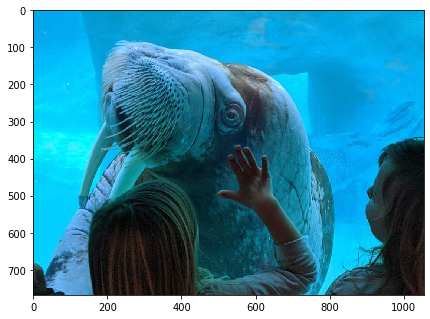

In [15]:
# Let's load an image of the adorable walrus:

walrus = Image.open('data/walrus.jpg')
plt.imshow(walrus)

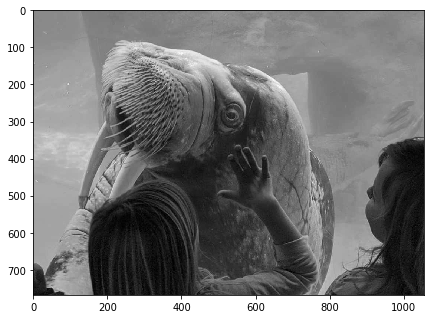

In [16]:
# Now let's convert it to grayscale and normalize (because this is what our convolution operation is expecting)
walrus = walrus.convert('L')
walrus = np.array(walrus)
walrus = walrus.astype(np.single)/0xff

plt.imshow(walrus, cmap='gray')

In [19]:
# Conv2D layer is expecting a 4D tensor (batch_size, channels, width, height)
# Let's bring the walrus into proper shape. We have batch of size one and only one channel
# so we will use the unsqueeze operation for this

walrus_tensor = torch.from_numpy(walrus).unsqueeze(0).unsqueeze(1)
walrus_tensor.shape

torch.Size([1, 1, 768, 1054])

In [20]:
%%time
# Let's compute the convolution map and ReLU activations. Note that we also used the time "magic function"
# to see how long it takes. Later on, you will compare other convolution methods that you will try.

convolved = conv2d(walrus_tensor)
relu = F.relu(convolved)

CPU times: user 45.1 ms, sys: 19.6 ms, total: 64.7 ms
Wall time: 85 ms


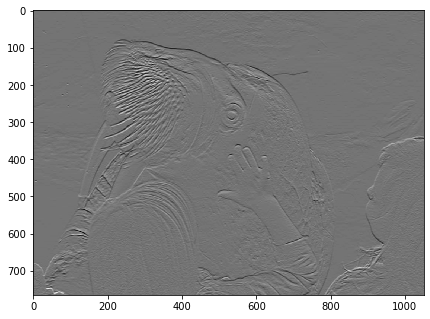

In [21]:
# And let's visualize them!

plt.imshow(np.squeeze(convolved.detach().numpy()), cmap="gray")

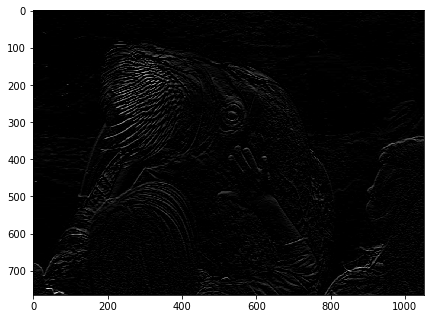

In [22]:
plt.imshow(np.squeeze(relu.detach().numpy()), cmap="gray")

Hurray, we've run a 2D convolutional layer with custom kernel, using PyTorch. Onwards to medical applications!

## Loading a NIFTI volume

Remembert how to use NiBabel to load those NIFTI volumes? Heres a refresher

Let us load our image

In [24]:
nii_img = nib.load('data/spleen.nii.gz')
img = nii_img.get_fdata()
img.shape

(512, 512, 41)

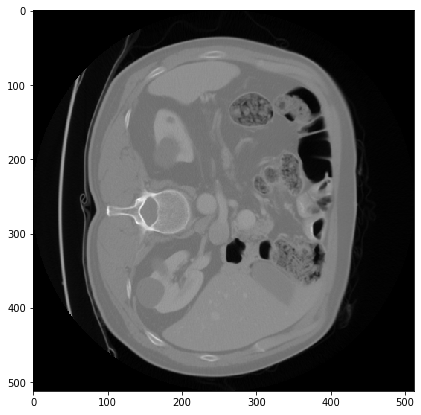

In [28]:
# let us visualize a slice:

plt.imshow(img[:,:, 20], cmap='gray')

By now you should've seen enough of these to recognize that you are looking at an abdominal cross-section. Now you are ready to apply convolutions!

But before we go there - a couple of notes about pixel sizes, on this particular image.


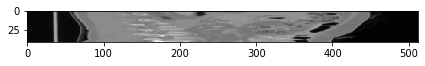

In [30]:
# Let's visualize sagittal cross-section at cut 250 (we will use rot90 since

plt.imshow(np.rot90(img[240,:,:]), cmap='gray')

Wow, that looks squished!

Remember our conversations about anisotropic voxels ? As you might have guessed, our pixels are much shorter in z dimension than they are in x and y. Let's see what we can do about it.

In [31]:
nii_img.header['pixdim']

array([1.      , 0.744141, 0.744141, 5.      , 0.      , 0.      ,
       0.      , 0.      ], dtype=float32)

Remember how we scaled DICOM image in previous lesson, to account for difference between in-plane resolution and resolution across z-axis? In NIFTI one extracts proper voxel aspect ratio from NIFTI image using the pixdim field.

Unlike DICOM, NIFTI files store all their pixel dimensions in a single place - pixdim field. Also unlike DICOM this field also stores a bunch of other stuff related to uses of NIFTI format beyond static 3D images. If you're curious what those are - check out the [NIFTI documentation.](https://nifti.nimh.nih.gov/nifti-1/documentation/nifti1fields/nifti1fields_pages/pixdim.html/document_view)

For the purpose of this exercise we are interested in values at locations 1, 2 and 3 - these are our x, y and z dimensions respectively.

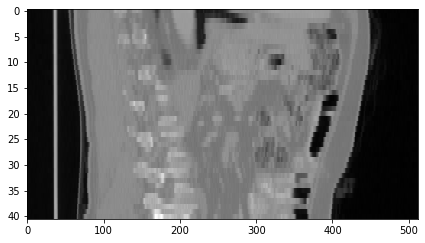

In [34]:
img2d = np.rot90(img[240,:,:])
plt.imshow(img2d, cmap='gray', aspect=nii_img.header['pixdim'][3]/nii_img.header['pixdim'][1])

In [38]:
# We will also give you a convenience function to visualize all slices in a grid as thumb

def display_volume_slices(img, w, h):
    plot_w = w
    plot_h = h
    
    # you can play with figsize parameters to adjust how large the images are
    fig, ax = plt.subplots(plot_h, plot_w, figsize=(35,35))
    
    for i in range(plot_w * plot_h):
        plt_x = i % plot_w
        plt_y = i // plot_w
        if (i < len(img)):
            ax[plt_y, plt_x].set_title(f'slice{i}')
            ax[plt_y, plt_x].imshow(img[i], cmap='gray')
        ax[plt_y, plt_x].axis('off')
    
    plt.show()

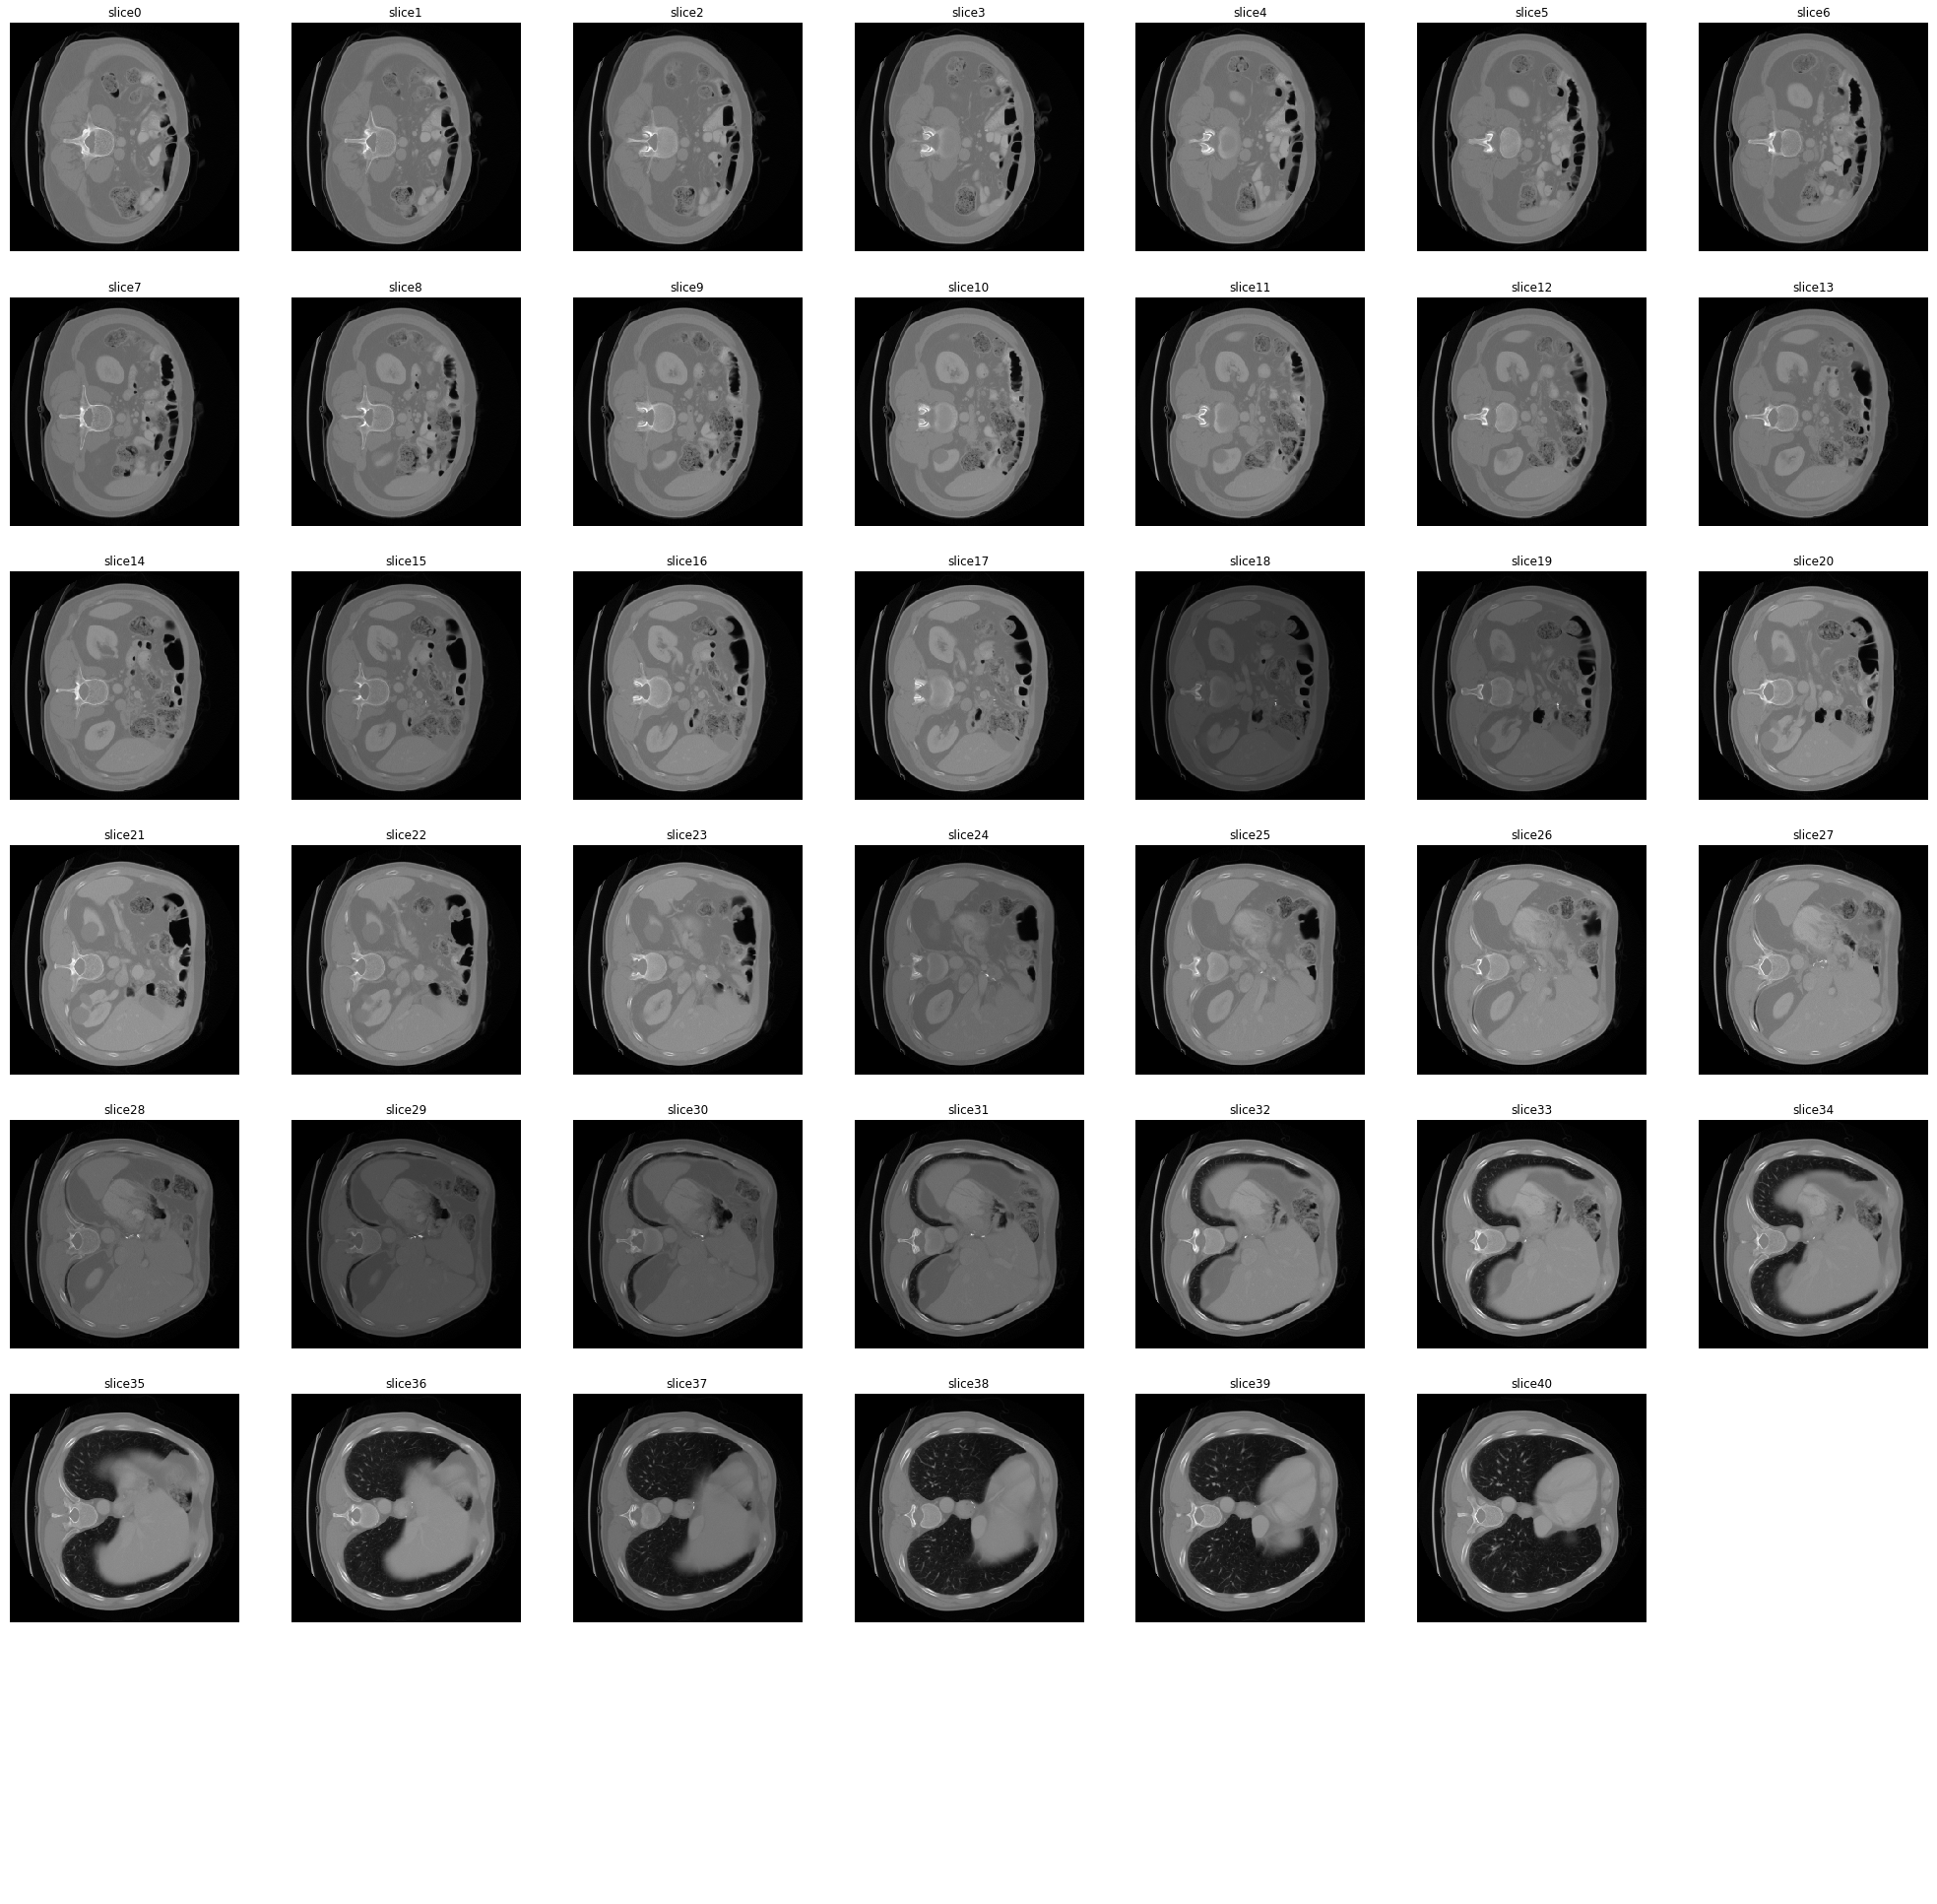

In [39]:
# And let's visualize ALL slices
#
# Note that we are calling np.transpose here because our display_volume_slices iterates over 0th dimension
# of the input volume. Our Nibabel volumes have z dimension stored in the 2nd position, so we 
# move the z-dimension in front of the other two here
display_volume_slices(np.transpose(img, (2,0,1)), 7,7)


## 2D Convolutions
**TASK**: Using the kernel we have defined above (or any other kernel you like), use the "2D Convolution" method to create a volume of convolution maps for all of the slices in our volume. Visualize them.

Use %%time (as we've done above) to see how much time it takes.  
How many parameters does define the convolution operation?

# 3D Convolutions

**TASK**: Using a 3D version of the same kernel, compute and time full 3D convolutions by using PyTorch's Conv3D layer. Note that our kernel represents a 2D edge filter. What would be a 3D edge filter?
# 2.5D Convolutions

> **Extra credit exercise**: _Depending on how familiar you are with Numpy and PyTorch, this exercise may take up to a few hours to complete. This exercise may help you understand the architecture of convolutions better, but is not essential to understanding the course. If you feel like this would be too time consuming you are welcome to move on or take a peek at the solution._

Now Let's try 2.5D convolutions. That's a bit more difficult since we want to be specific about how exactly we select data for our extra planes, and also for it to be meaningful we would like to combine data in small areas around area of interest which means we would need to process image in patches. This is not something PyTorch offers right out of the box, and you would engage in something like this if you are conscious of performance, so you would want to have control over this anyway. A bit more coding will be required than previous exercises. 

We will try to recreate the approach to building convolutions which has been presented in [this paper from the NIH](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4295635/). Specifically, we will build a layer that runs a convolutional filter over patches that look like this:

<img src="img/25d.jpg" width="200">

**TASK**: Using same kernel, compute and time creation of a volume of convolutional feature maps using the 2.5D convolutions approach by looking at 16x16x16 patches and extracting three square segments from the center of the patch, along the cardinal planes, similar to how it was described in the lesson video. Treat the three 16x16 segments as input channels for your convolutional layer still using one output channel). Visualize all axial slices of your convolutional feature map.

You can find the solution for the [__Exercise 1: Fun with Convolutions here__](https://github.com/udacity/nd320-c3-3d-med-imaging/tree/master/3d-imaging-end-to-end-deep-learning-applications/exercises/1-convolutions/solution). The solution is presented as Jupyter Notebook with some additional inline comments. Note that there are some design decisions you could take with 2.5D convolutions - you can choose different patch size or choose to combine the neighboring slices differently. Ultimately, this is a compromise between memory use and the information that you give to your network. It is useful to track the number of trainable parameters of your network (which is largely driven by convolutional operations) to get an idea of total memory needed for training.

## Classification: Summary

This is the end of our section on classification and object detection.

Note that we did not spend too much time on the actual methods for building networks for classification and object detection, and as you will see further in the lesson, there is more focus on segmentation, especially on performance metrics and coding exercises.

The reason for that is that classification problems in 3D medical imaging can leverage a lot of techniques used for 2D image classification, and the course on AI for 2D medical image analysis, which is a part of this nanodegree, already provides an excellent deep dive into some of the approaches for classification and object detection problems. We talked about some of the differences between 2D and 3D classification problems such as 3D and 2.5D convolutions and hopefully, through our convolutions exercise, got you a feel of how these work and how you would code one yourself. But if you want to ground yourself better in applying CNNs for classification and object detection problems, I suggest going through the course on AI for 2D medical image analysis.

Further Resources
If you think you’re lost in convolutions - check out this [2D Visualization of a Convolutional Neural Network by Adam W. Harley.](https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html)

[A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf) is a great overview of the arithmetic of the various convolution operations.

The paper I had mentioned in the slides where the authors use 2.5D convolutions for a variety of pathology classifiers: [H. R. Roth et al., "Improving Computer-Aided Detection Using Convolutional Neural Networks and Random View Aggregation," in IEEE Transactions on Medical Imaging, vol. 35, no. 5, pp. 1170-1181, May 2016.](https://arxiv.org/pdf/1505.03046.pdf)

Another paper by the same authors presenting a 2.5D convolutions approach for lymph node detection: [Roth, Holger R., et al. “A New 2.5D Representation for Lymph Node Detection Using Random Sets of Deep Convolutional Neural Network Observations.” Medical Image Computing and Computer-Assisted Intervention – MICCAI 2014 Lecture Notes in Computer Science, 2014, pp. 520–527., doi:10.1007/978-3-319-10404-1_65](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4295635/)

This paper is comparing 3D and 2D network architectures for lung nodule classification problem: [Kang G, Liu K, Hou B, Zhang N (2017) 3D multi-view convolutional neural networks for lung nodule classification. PLoS ONE 12(11): e0188290. https://doi.org/10.1371/journal.pone.0188290](https://doi.org/10.1371/journal.pone.0188290)